In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Machine_Learning_Dataset/4-Algerian_forest_fires_dataset.csv")

In [3]:
df.head()
# önce datayi anla , stunlarin ne is yaptigini anla , terimleri ögren...
# amacimiz FWI yi bulmak.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
df[df.isnull().any(axis=1)] # null degerlerin oldugu tum satirlari gösterir.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
# bu datasetin aciklamasinda iki farkli bölgenin datasini iceriyormus diyor. 
# burada 123 ten sonra olanlar Sidi-Bel Abbes Region Dataset oluyor. 
# tek csv de iki dataset yapmislar 

In [8]:
df.drop(122,inplace=True)

In [9]:
df[df.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:123, "Region"] = 0 # 123'ten öncekilere Region stununa 0 ata
df.loc[123:, "Region"] = 1 # 123'ten sonraki Region stununa 1 ata
# burada iki farkli dataseti ayirmak yerine bunu yeni olusturdugumuz Region stunu ile belirtiyoruz.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.9+ KB


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
df = df.dropna().reset_index(drop=True)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.columns = df.columns.str.strip() # stun isimlerindeki bosluklari siler.

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.drop(122,inplace=True)

In [18]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [19]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [20]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [24]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [25]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1) 
# icinde not fire icerenleri 0 yap icermeyenleri 1 yap dedik.
# tek tek data duzeltmek yerine kisa sekilde tum datayi duzelttik

In [26]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


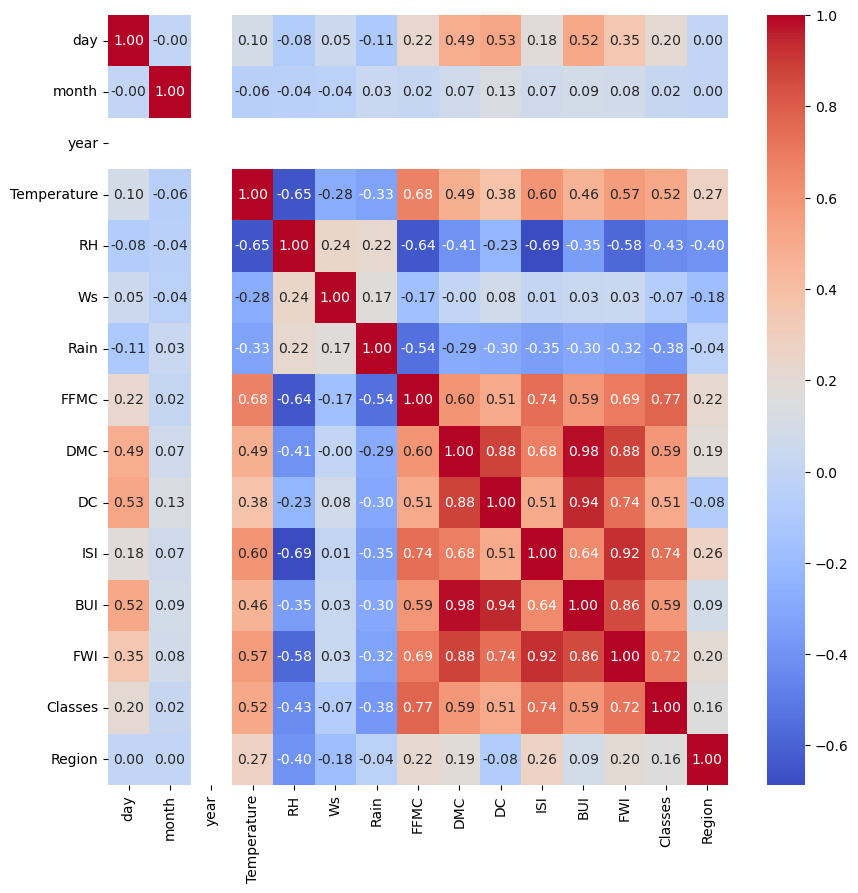

In [28]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.show()

In [29]:
df.drop(["day", "month","year"], inplace=True, axis=1)

In [30]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [31]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [32]:
# dependent , independent features
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]
y = df['FWI']


In [33]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  Region       243 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 22.8 KB


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [36]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [37]:
# redundancy => iki tane independent featurenin birbiri ile kolerasyonu cok yuksekse bilgi tekrari yapiyor olabilir.
# yuksek kolerasyon bilgi kirliligi yapiyor.
# multicollinearity => coklu dogrusal baginti, 
# overfitting
# bu yuzden kolerasyonu cok yuksek olan stundan 1'ini cikartiyoruz. 

In [38]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range (i):
            if abs(corr.iloc[i, j] > threshold):
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop            

In [39]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [40]:
X_train.drop(columns_dropping, axis=1, inplace=True)
X_test.drop(columns_dropping, axis=1, inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

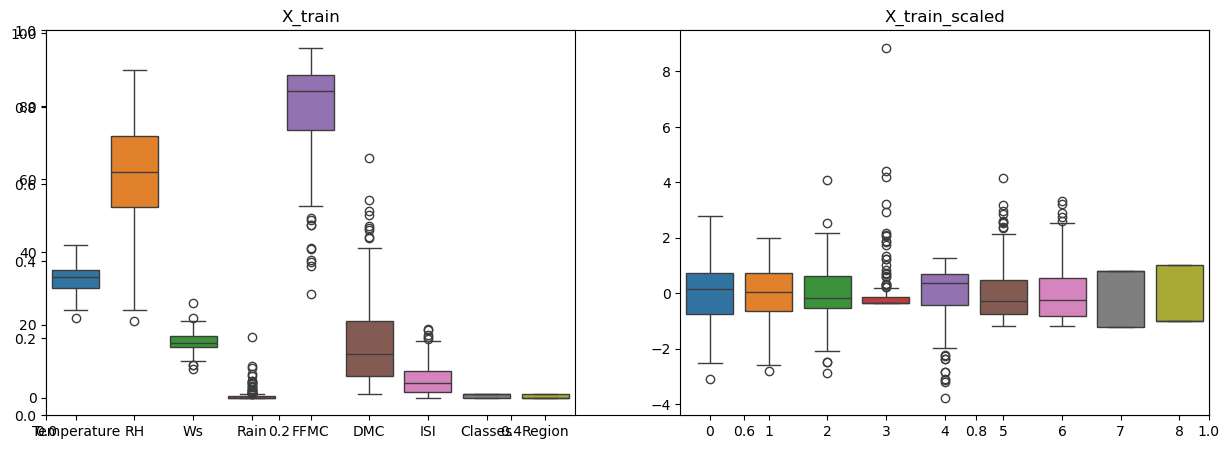

In [44]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absulute Error:  0.703601172957592
Mean Square Error:  0.876416369860599
R2 Error:  0.9838729275348057


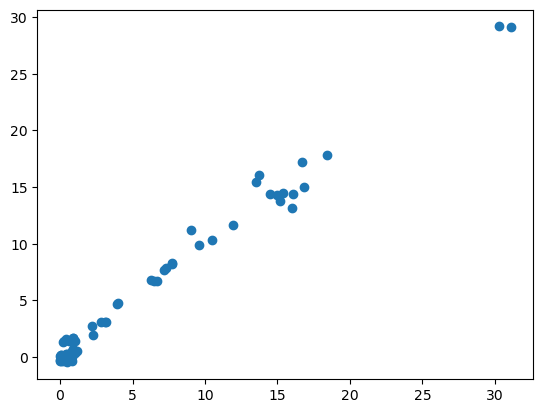

In [46]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absulute Error:  1.216272633800629
Mean Square Error:  2.6029377368132187
R2 Error:  0.9521029422229386


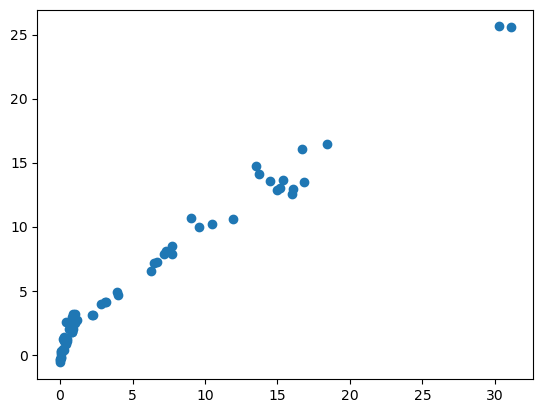

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absulute Error:  0.7093542448703323
Mean Square Error:  0.8868348464263084
R2 Error:  0.9836812155445575


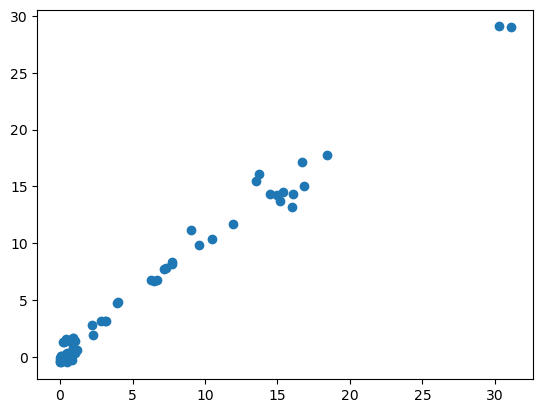

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absulute Error:  1.7493286471090155
Mean Square Error:  5.569160502382823
R2 Error:  0.8975210207375393


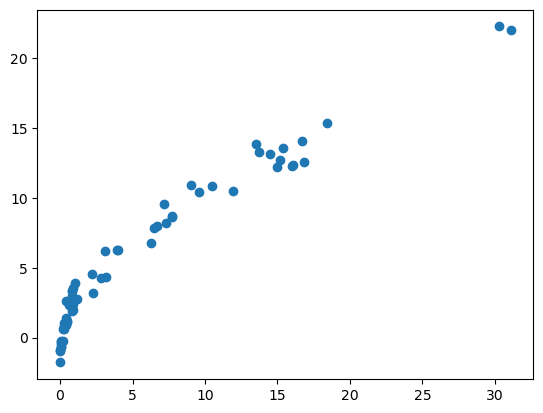

In [49]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [50]:
# lasso cros validation
from sklearn.linear_model import LassoCV

Mean Absulute Error:  0.722230815630542
Mean Square Error:  0.8972011670293635
R2 Error:  0.9834904632842026


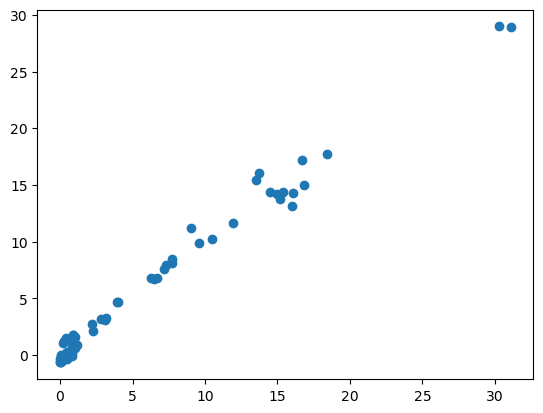

In [51]:
lassocv= LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [52]:
lassocv.alpha_ # en iyi degeri veren alpha(lamda ,ceza) 

np.float64(0.031548475118595085)

In [53]:
lassocv.alphas_ # burada da denedigi alpha, ceza katsayilari var

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

Mean Absulute Error:  0.7093542448703323
Mean Square Error:  0.8868348464263084
R2 Error:  0.9836812155445575


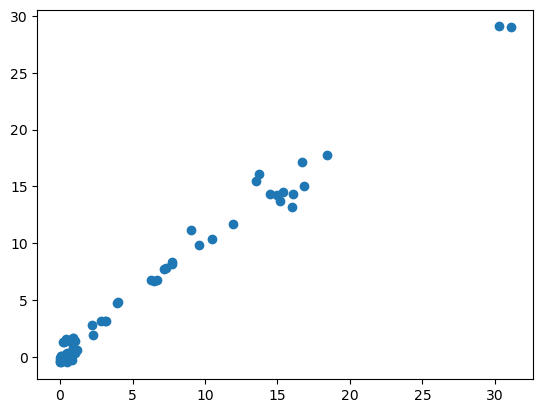

In [54]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absulute Error:  0.7354284604918179
Mean Square Error:  0.9249125778630383
R2 Error:  0.9829805413498388


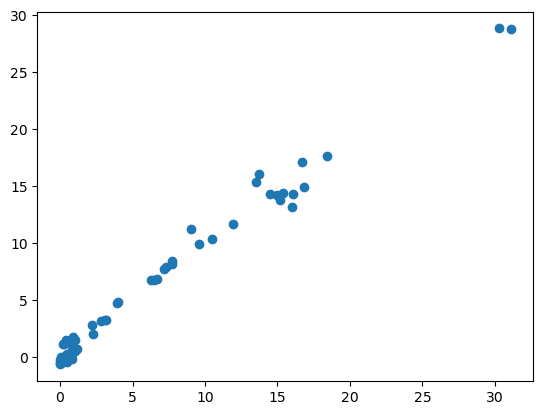

In [55]:
from sklearn.linear_model import ElasticNetCV

elastik_netcv = ElasticNetCV(cv=5)
elastik_netcv.fit(X_train_scaled, y_train)
y_pred = elastik_netcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [56]:
elastik_netcv.alpha_

np.float64(0.025472347707234465)

In [57]:
elastik_netcv.alphas_

array([13.59382584, 12.67764748, 11.82321647, 11.02637125, 10.28323073,
        9.5901754 ,  8.94382967,  8.34104549,  7.77888694,  7.25461599,
        6.76567915,  6.30969502,  5.8844427 ,  5.48785095,  5.11798817,
        4.77305289,  4.4513651 ,  4.15135799,  3.87157036,  3.61063947,
        3.36729446,  3.14035008,  2.928701  ,  2.73131635,  2.54723477,
        2.37555967,  2.2154549 ,  2.06614066,  1.92688969,  1.79702377,
        1.67591039,  1.56295964,  1.45762139,  1.35938258,  1.26776475,
        1.18232165,  1.10263712,  1.02832307,  0.95901754,  0.89438297,
        0.83410455,  0.77788869,  0.7254616 ,  0.67656792,  0.6309695 ,
        0.58844427,  0.5487851 ,  0.51179882,  0.47730529,  0.44513651,
        0.4151358 ,  0.38715704,  0.36106395,  0.33672945,  0.31403501,
        0.2928701 ,  0.27313164,  0.25472348,  0.23755597,  0.22154549,
        0.20661407,  0.19268897,  0.17970238,  0.16759104,  0.15629596,
        0.14576214,  0.13593826,  0.12677647,  0.11823216,  0.11